In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from IPython.display import Image

IMAGE_PATH = "./Data/"
IMAGE_CLASSIFICATIONS = ["Non Demented", "Very mild Dementia", "Mild Dementia", "Moderate Dementia" ]

### READ THE DATA

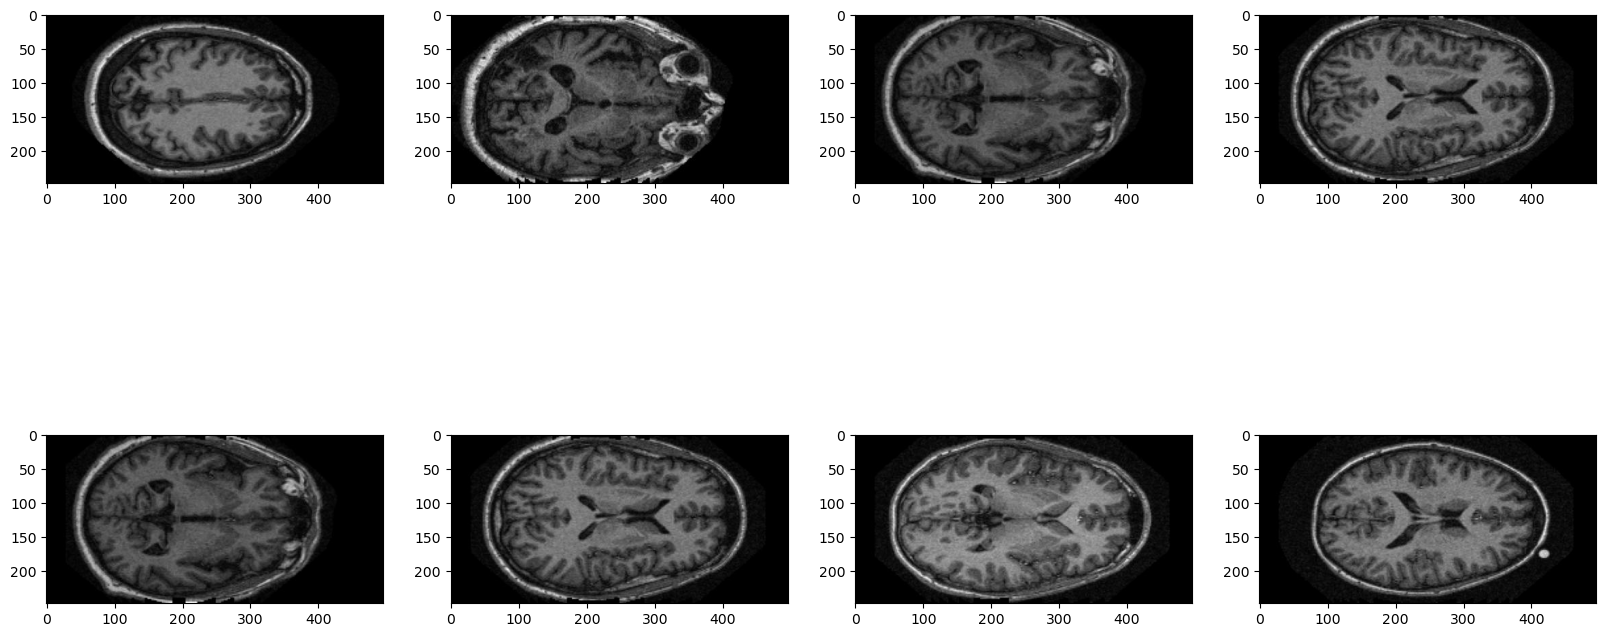

In [10]:
## Dataset: https://www.kaggle.com/datasets/ninadaithal/imagesoasis?resource=download

indx=0
images = []

for i in range(len(IMAGE_CLASSIFICATIONS)):
    for idx, img in enumerate(os.listdir(IMAGE_PATH + IMAGE_CLASSIFICATIONS[i])):
        img_loaded = load_img(
        IMAGE_PATH + IMAGE_CLASSIFICATIONS[i] + "/" + img)
        images.append(img_loaded)
               
nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        indx = i*nrows+j
        axs[i,j].imshow(images[indx])

In [11]:
indx=0
classification_data = []

for i in range(len(IMAGE_CLASSIFICATIONS)):
    for idx, img in enumerate(os.listdir(IMAGE_PATH + IMAGE_CLASSIFICATIONS[i])):
#         img_loaded = load_img(
#         IMAGE_PATH + IMAGE_CLASSIFICATIONS[i] + "/" + img)
        classification_data.append([img, i+1])
        
classification_df = pd.DataFrame(classification_data, columns=["Image_url", "Classification"])
print(classification_df.head())

                     Image_url  Classification
0  OAS1_0349_MR1_mpr-4_142.jpg               1
1  OAS1_0317_MR1_mpr-1_141.jpg               1
2  OAS1_0234_MR1_mpr-4_136.jpg               1
3  OAS1_0182_MR1_mpr-1_139.jpg               1
4  OAS1_0132_MR1_mpr-2_117.jpg               1


                     Image_url  Classification
0  OAS1_0349_MR1_mpr-4_142.jpg               1
1  OAS1_0317_MR1_mpr-1_141.jpg               1
2  OAS1_0234_MR1_mpr-4_136.jpg               1
3  OAS1_0182_MR1_mpr-1_139.jpg               1
4  OAS1_0132_MR1_mpr-2_117.jpg               1
       Classification
count    86437.000000
mean         1.291461
std          0.596764
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
[1 2 3 4]
1    67222
2    13725
3     5002
4      488
Name: Classification, dtype: int64


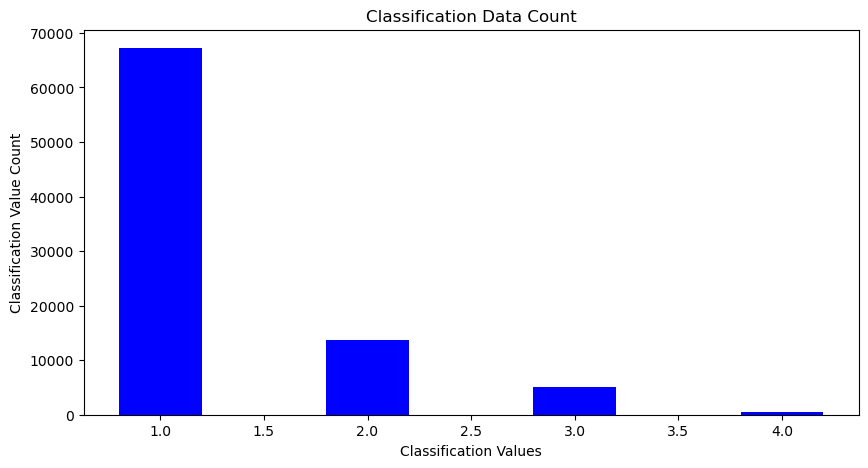

In [12]:
print(classification_df.head())
print(classification_df.describe())
print(classification_df["Classification"].unique())
print(classification_df["Classification"].value_counts())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classification_df["Classification"].unique(), classification_df["Classification"].value_counts(), color ='blue',
        width = 0.4)
 
plt.xlabel("Classification Values")
plt.ylabel("Classification Value Count")
plt.title("Classification Data Count")
plt.show()

Since we have an imbalance in our data, to begin we will normalize our data by combining 'Very mild Dementia', 'Mild Dementia', 'Moderate Dementia' into the Dementia category, and will re scale the 'Non Demented' category to match the number of values to the new Dementia category. We will select random values from the 'Non Demented' category to build the new column.

In [13]:
print(classification_df.head())
non_demented = classification_df[classification_df["Classification"].isin([1])]
non_demented = non_demented.sample(n=19215, random_state=42)
non_demented["Original_Classification"] = non_demented["Classification"]
non_demented["Original_Classification"] = non_demented["Original_Classification"] - 1
print(non_demented["Classification"].unique())
dementia = classification_df[classification_df["Classification"].isin((2,3,4))]
dementia["Original_Classification"] = dementia["Classification"]
dementia["Original_Classification"] = dementia["Original_Classification"] - 1
condition = dementia['Classification'] >= 2
dementia.loc[condition, 'Classification'] = 2
print(non_demented.shape)
print(dementia.shape)

classification_df = pd.merge(non_demented, dementia, on=["Image_url","Classification", "Original_Classification"], how='outer')
print(classification_df.head())
print(classification_df["Classification"].unique())
print(classification_df["Classification"].value_counts())

                     Image_url  Classification
0  OAS1_0349_MR1_mpr-4_142.jpg               1
1  OAS1_0317_MR1_mpr-1_141.jpg               1
2  OAS1_0234_MR1_mpr-4_136.jpg               1
3  OAS1_0182_MR1_mpr-1_139.jpg               1
4  OAS1_0132_MR1_mpr-2_117.jpg               1
[1]
(19215, 3)
(19215, 3)
                     Image_url  Classification  Original_Classification
0  OAS1_0350_MR1_mpr-1_118.jpg               1                        0
1  OAS1_0105_MR1_mpr-1_154.jpg               1                        0
2  OAS1_0262_MR1_mpr-2_156.jpg               1                        0
3  OAS1_0313_MR1_mpr-1_136.jpg               1                        0
4  OAS1_0220_MR1_mpr-4_107.jpg               1                        0
[1 2]
1    19215
2    19215
Name: Classification, dtype: int64


/var/folders/wv/10kjqk217c5039dg4pbqggh00000gn/T/ipykernel_44543/4193055957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dementia["Original_Classification"] = dementia["Classification"]
/var/folders/wv/10kjqk217c5039dg4pbqggh00000gn/T/ipykernel_44543/4193055957.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dementia["Original_Classification"] = dementia["Original_Classification"] - 1


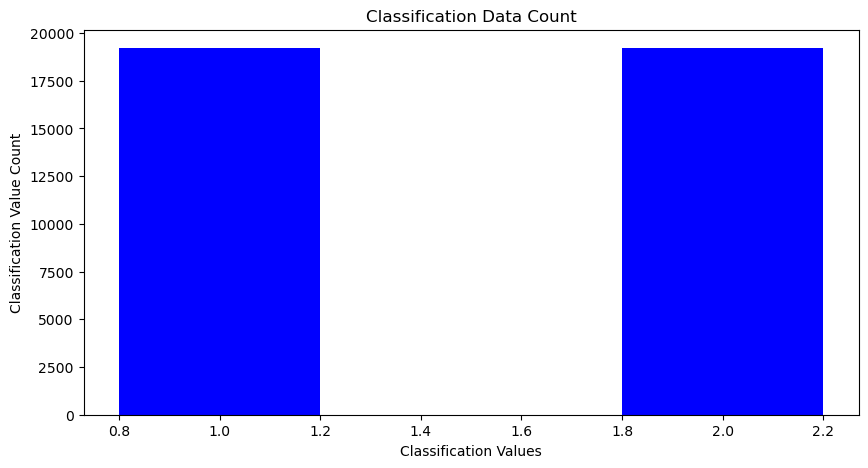

In [14]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classification_df["Classification"].unique(), classification_df["Classification"].value_counts(), color ='blue',
        width = 0.4)
 
plt.xlabel("Classification Values")
plt.ylabel("Classification Value Count")
plt.title("Classification Data Count")
plt.show()

##### Transforming Images to eventually use with our model to see if it helps with our results.

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=496x248 at 0x303713610>


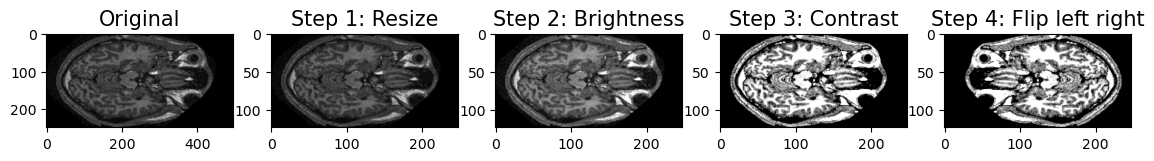

In [17]:
## Test some image convertions
image = load_img(
        IMAGE_PATH + IMAGE_CLASSIFICATIONS[classification_df.iloc[0]["Original_Classification"]] + 
        "/" + 
        classification_df.iloc[0]["Image_url"])
# image = classification_df.iloc[0]["Image"]
print(image)
image = img_to_array(image)

fig = plt.figure(figsize=(14, 12))

# plot original
ax = fig.add_subplot(1, 5, 1)
ax.imshow(array_to_img(image))
ax.set_title('Original', size=15);

# resize
ax = fig.add_subplot(1, 5, 2)
img_resize = tf.image.resize(image, size=(124, 248))
img_resize = array_to_img(img_resize)
ax.imshow(img_resize)
ax.set_title('Step 1: Resize', size=15);


# adjust brightness
ax = fig.add_subplot(1, 5, 3)
img_bright = tf.image.adjust_brightness(img_resize, 0.3)
img_bright = array_to_img(img_bright)
ax.imshow(img_bright)
ax.set_title('Step 2: Brightness', size=15);


# adjust contrast
ax = fig.add_subplot(1, 5, 4)
img_contrast = tf.image.adjust_contrast(img_bright, contrast_factor=3)
img_contrast = array_to_img(img_contrast)
ax.imshow(img_contrast)
ax.set_title('Step 3: Contrast', size=15);


# flip left right
ax = fig.add_subplot(1, 5, 5)
img_flip = tf.image.flip_left_right(img_contrast)
img_flip = array_to_img(img_flip)
ax.imshow(img_flip)
ax.set_title('Step 4: Flip left right', size=15);

Get Train, Validation and Test data

In [32]:
def resizeImage(row, size, delta, contrast_factor):
    image = load_img(
        IMAGE_PATH + IMAGE_CLASSIFICATIONS[row["Original_Classification"]] + 
        "/" + 
        row["Image_url"])
    image = img_to_array(image)
    # adjust size
    image = tf.image.resize(image, size=size)
    # adjust brightness
    image = tf.image.adjust_brightness(image, delta=delta)
    # adjust contrast
    image = tf.image.adjust_contrast(image, contrast_factor=contrast_factor)
    # random flip
    image = tf.image.random_flip_left_right(image)
    return image

def getDatasets(images,
                split=(0.6, 0.2, 0.2),
                image_size=(124, 248),
                delta=0.3,
                contrast_factor=3):
    
    ## Split data into Train, Validation and Test datasets
    images = images.sample(frac=1, ignore_index=True)
    split_train = int(len(images) * split[0])
    split_val = int(len(images) * split[1])
    split_test = int(len(images) * split[2])
    print(split_train)
    print(split_val)
    print(split_test)
    
    train = images[:split_train]
    val = images[split_train:split_train + split_val]
    test = images[split_train + split_val:split_train + split_val + split_test]
    print(len(train))
    print(len(val))
    print(len(test))
    
    ## image resizing on Train, Validation and Test datasets
    train["Image"] = train.apply(
        lambda row: resizeImage(row, image_size, delta, contrast_factor), axis = 1
    )
    val["Image"] = val.apply(
        lambda row: resizeImage(row, image_size, delta, contrast_factor), axis = 1
    )
    test["Image"] = test.apply(
        lambda row: resizeImage(row, image_size, delta, contrast_factor), axis = 1
    )
    
    return train, val, test
    
train, val, test = getDatasets(classification_df)

23058
7686
7686
23058
7686
7686


/var/folders/wv/10kjqk217c5039dg4pbqggh00000gn/T/ipykernel_44543/1115193025.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Image"] = train.apply(
/var/folders/wv/10kjqk217c5039dg4pbqggh00000gn/T/ipykernel_44543/1115193025.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["Image"] = val.apply(
/var/folders/wv/10kjqk217c5039dg4pbqggh00000gn/T/ipykernel_44543/1115193025.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

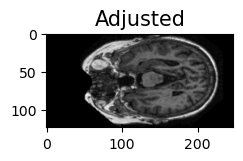

In [31]:
image = train.iloc[0]["Image"]

fig = plt.figure(figsize=(14, 12))

# plot original
ax = fig.add_subplot(1, 5, 1)
ax.imshow(array_to_img(image))
ax.set_title('Adjusted', size=15);